# Linear Regression

Import required packages

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [135]:
dataset = pd.read_csv("listings.csv", delimiter=";")
dataset["reviews_per_month"] = dataset["reviews_per_month"].replace(",", ".", regex=True)
dataset = dataset.dropna()
dataset = dataset.astype({"price" : "int32", "minimum_nights" : "int32", "number_of_reviews" : "int32", 
                          "calculated_host_listings_count" : "int32", "availability_365" : "int32", 
                          "reviews_per_month" : "float64"})
dataset["last_review"] = pd.to_datetime(dataset["last_review"], format= "%d/%m/%Y")
print(dataset.dtypes)
print(dataset.isna().values.any())
print(dataset.head())

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                                 object
price                                      int32
minimum_nights                             int32
number_of_reviews                          int32
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int32
availability_365                           int32
dtype: object
False
      id                                 name host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2  266763  Francesca   
1  50646      Pleasant Room along Bukit Timah  227796    Suj

Select particular column, and visualise the data (histogram)

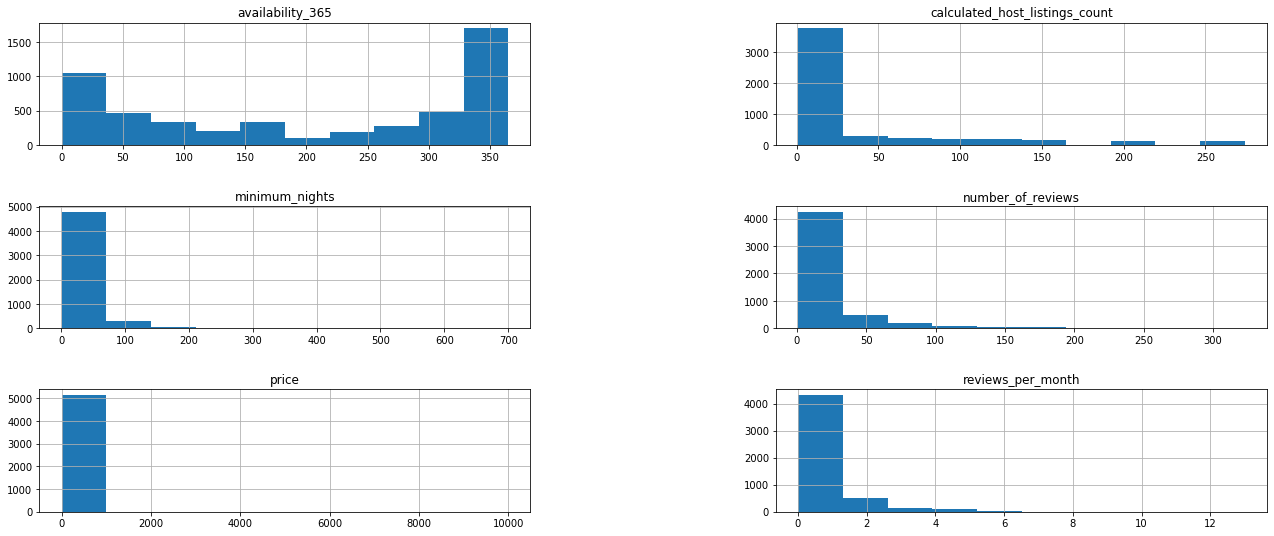

In [136]:
newDataset = dataset[["neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", 
                      "last_review", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
newDataset.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

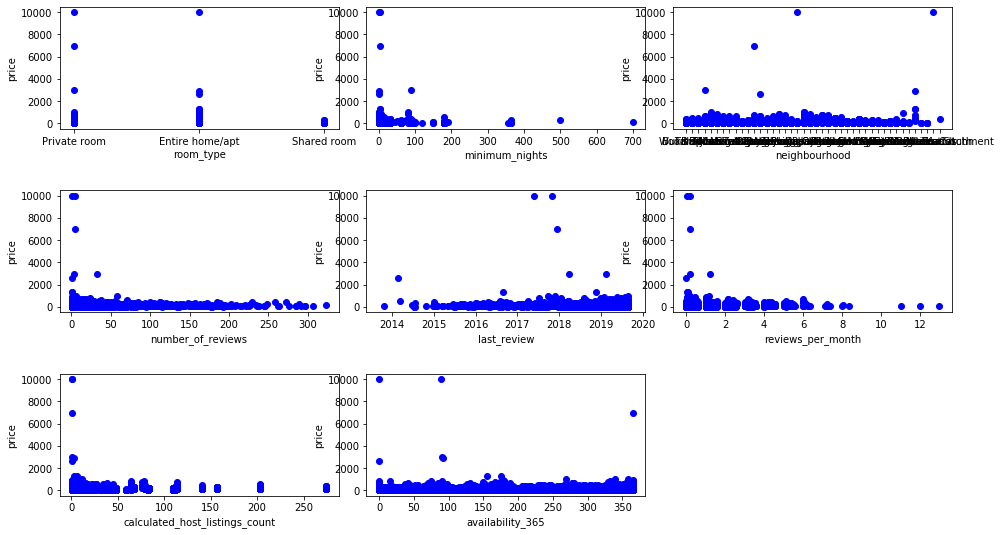

In [137]:
plt.subplot(331)
plt.scatter(newDataset["room_type"], newDataset["price"], color="blue") # jenis diagramnya Scatter, color bisa diganti"
plt.xlabel("room_type")
plt.ylabel("price")

plt.subplot(332)
plt.scatter(newDataset["minimum_nights"], newDataset["price"], color="blue")
plt.xlabel("minimum_nights")
plt.ylabel("price")


plt.subplot(333)
plt.scatter(newDataset["neighbourhood"], newDataset["price"], color="blue")
plt.xlabel("neighbourhood")
plt.ylabel("price")

plt.subplot(334)
plt.scatter(newDataset["number_of_reviews"], newDataset["price"], color="blue")
plt.xlabel("number_of_reviews")
plt.ylabel("price")

plt.subplot(335)
plt.scatter(newDataset["last_review"], newDataset["price"], color="blue")
plt.xlabel("last_review")
plt.ylabel("price")

plt.subplot(336)
plt.scatter(newDataset["reviews_per_month"], newDataset["price"], color="blue")
plt.xlabel("reviews_per_month")
plt.ylabel("price")

plt.subplot(337)
plt.scatter(newDataset["calculated_host_listings_count"], newDataset["price"], color="blue")
plt.xlabel("calculated_host_listings_count")
plt.ylabel("price")

plt.subplot(338)
plt.scatter(newDataset["availability_365"], newDataset["price"], color="blue")
plt.xlabel("availability_365")
plt.ylabel("price")

plt.subplots_adjust(hspace = 0.5, wspace = 0.1)
plt.rcParams["figure.figsize"] = [22,9]
plt.show()

Regression - Engine Size

In [152]:
train, test = train_test_split(newDataset, test_size=0.3) # train > test
regression = linear_model.LinearRegression() # untuk bikin regresi
regression.fit(train[["number_of_reviews"]], train[["price"]])
print('Coefficients: ', regression.coef_) #coeff: b nya dalam y=bx+c
print('Intercept: ',regression.intercept_) # intercept: c nya dalam y=bx+c
print('Train: ',len(train))
print('Test: ',len(test))

Coefficients:  [[-0.30942265]]
Intercept:  [158.14090943]
Train:  3595
Test:  1541


Visualise the regression to the plot

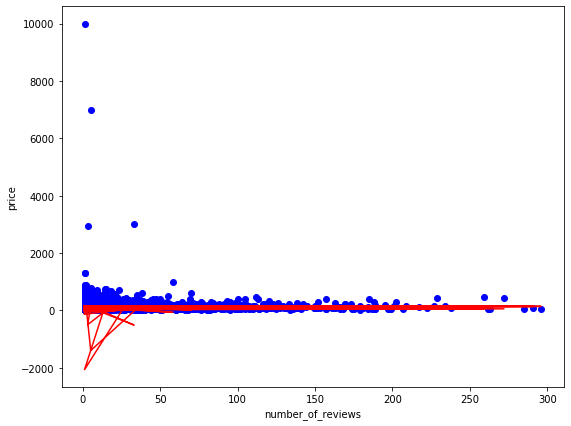

In [148]:
plt.scatter(train["number_of_reviews"], train["price"],  color='blue')
plt.plot(train[["number_of_reviews"]], regression.coef_ * train[["price"]] + regression.intercept_, '-r') # engine size dapet dari engine size di csv
plt.xlabel("number_of_reviews")
plt.ylabel("price")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()
#yg biru: training set nya
#yg merah: regression nya
#mau pake garis, mau pake titik" 
#+r jadi bentuk x
#-r garis
#ro jadi titik"

Make the visualisation easier with Seaborn Package

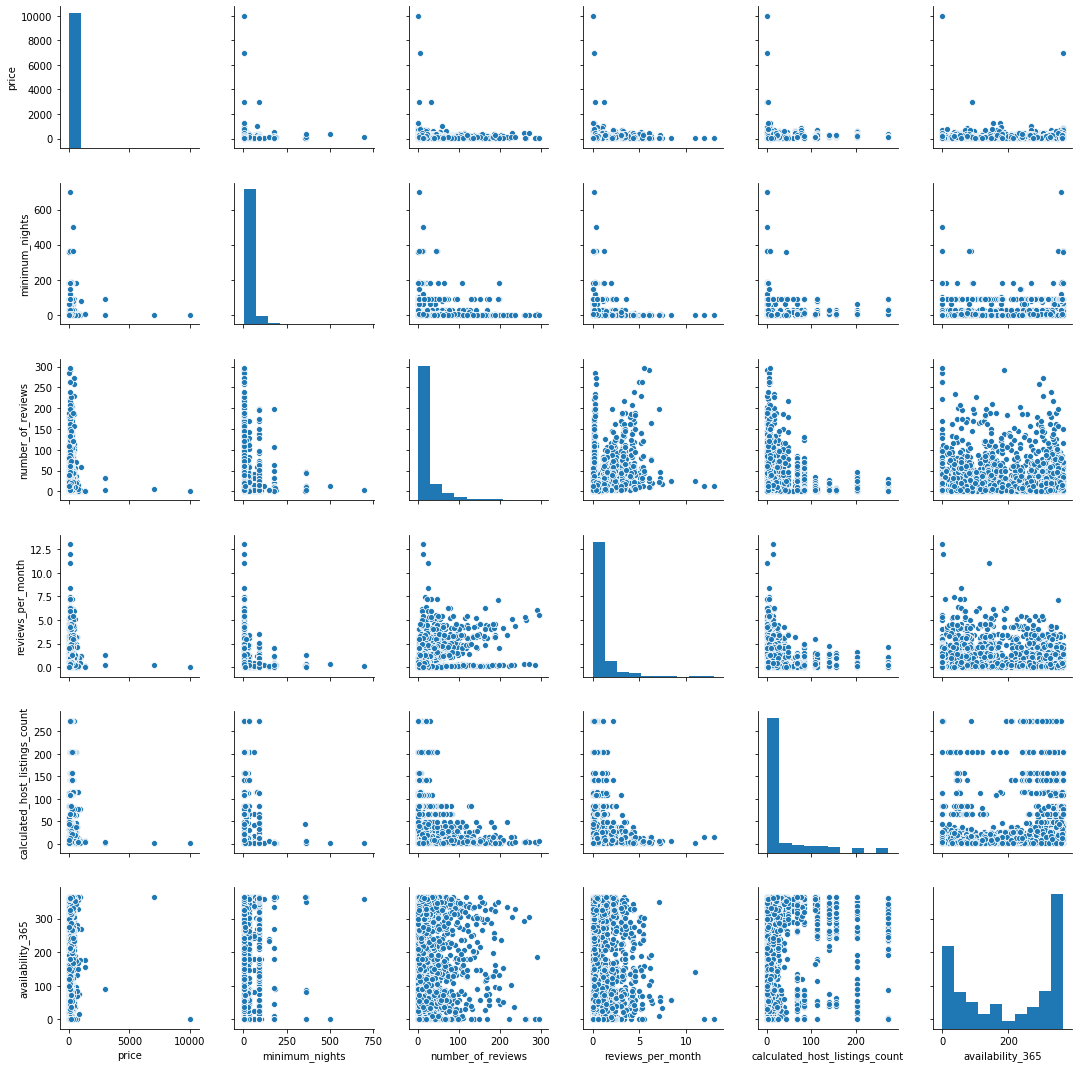

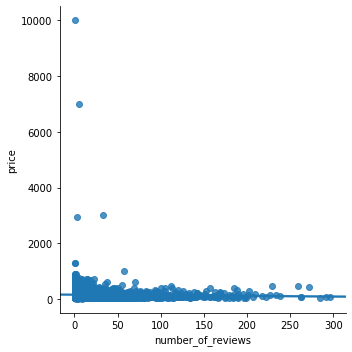

In [146]:
sb.pairplot(train)
sb.lmplot("number_of_reviews", "price", data = train)
plt.show()

Predict new data & evaluate the model

In [149]:
prediction = regression.predict(test[["number_of_reviews"]])
for i in range(len(test)):
  print(test[["number_of_reviews"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["price"]], prediction)) #Mean Absolute Error
print("MSE : ", mean_squared_error(test[["price"]], prediction)) #Mean Square Error
print("R2 : ", r2_score(test[["price"]], prediction)) #R2 Score


[2] [153.12936131]
[5] [152.46385361]
[4] [152.68568951]
[1] [153.35119721]
[22] [148.69264331]
[4] [152.68568951]
[11] [151.13283821]
[35] [145.80877661]
[5] [152.46385361]
[28] [147.36162791]
[12] [150.91100231]
[1] [153.35119721]
[1] [153.35119721]
[1] [153.35119721]
[60] [140.2628791]
[1] [153.35119721]
[40] [144.6995971]
[2] [153.12936131]
[8] [151.79834591]
[1] [153.35119721]
[4] [152.68568951]
[75] [136.9353406]
[84] [134.9388175]
[2] [153.12936131]
[26] [147.80529971]
[59] [140.484715]
[2] [153.12936131]
[12] [150.91100231]
[1] [153.35119721]
[3] [152.90752541]
[11] [151.13283821]
[3] [152.90752541]
[3] [152.90752541]
[7] [152.02018181]
[67] [138.7100278]
[37] [145.36510481]
[1] [153.35119721]
[2] [153.12936131]
[1] [153.35119721]
[13] [150.68916641]
[18] [149.57998691]
[33] [146.25244841]
[24] [148.24897151]
[10] [151.35467411]
[8] [151.79834591]
[20] [149.13631511]
[5] [152.46385361]
[37] [145.36510481]
[158] [118.52296088]
[14] [150.46733051]
[3] [152.90752541]
[8] [151.7983

[10] [151.35467411]
[100] [131.38944309]
[5] [152.46385361]
[1] [153.35119721]
[32] [146.47428431]
[18] [149.57998691]
[100] [131.38944309]
[1] [153.35119721]
[60] [140.2628791]
[285] [90.34980156]
[18] [149.57998691]
[10] [151.35467411]
[15] [150.24549461]
[50] [142.4812381]
[56] [141.1502227]
[3] [152.90752541]
[23] [148.47080741]
[5] [152.46385361]
[9] [151.57651001]
[23] [148.47080741]
[14] [150.46733051]
[41] [144.4777612]
[203] [108.54034537]
[1] [153.35119721]
[6] [152.24201771]
[27] [147.58346381]
[11] [151.13283821]
[90] [133.60780209]
[56] [141.1502227]
[7] [152.02018181]
[4] [152.68568951]
[236] [101.21976067]
[2] [153.12936131]
[19] [149.35815101]
[35] [145.80877661]
[3] [152.90752541]
[11] [151.13283821]
[31] [146.69612021]
[5] [152.46385361]
[8] [151.79834591]
[88] [134.0514739]
[1] [153.35119721]
[2] [153.12936131]
[1] [153.35119721]
[130] [124.73436609]
[6] [152.24201771]
[2] [153.12936131]
[6] [152.24201771]
[198] [109.64952487]
[17] [149.80182281]
[3] [152.90752541]
[

[1] [153.35119721]
[31] [146.69612021]
[1] [153.35119721]
[99] [131.61127899]
[1] [153.35119721]
[2] [153.12936131]
[1] [153.35119721]
[58] [140.7065509]
[1] [153.35119721]
[1] [153.35119721]
[1] [153.35119721]
[3] [152.90752541]
[3] [152.90752541]
[1] [153.35119721]
[1] [153.35119721]
[6] [152.24201771]
[7] [152.02018181]
[2] [153.12936131]
[3] [152.90752541]
[1] [153.35119721]
[16] [150.02365871]
[4] [152.68568951]
[5] [152.46385361]
[46] [143.3685817]
[137] [123.18151479]
[8] [151.79834591]
[12] [150.91100231]
[4] [152.68568951]
[88] [134.0514739]
[25] [148.02713561]
[39] [144.921433]
[5] [152.46385361]
[1] [153.35119721]
[31] [146.69612021]
[6] [152.24201771]
[10] [151.35467411]
[25] [148.02713561]
[2] [153.12936131]
[3] [152.90752541]
[8] [151.79834591]
[1] [153.35119721]
[42] [144.2559253]
[2] [153.12936131]
[1] [153.35119721]
[4] [152.68568951]
[1] [153.35119721]
[276] [92.34632466]
[1] [153.35119721]
[20] [149.13631511]
[2] [153.12936131]
[29] [147.13979201]
[1] [153.35119721]


[1] [153.35119721]
[7] [152.02018181]
[22] [148.69264331]
[110] [129.17108409]
[48] [142.9249099]
[28] [147.36162791]
[2] [153.12936131]
[67] [138.7100278]
[3] [152.90752541]
[1] [153.35119721]
[25] [148.02713561]
[5] [152.46385361]
[9] [151.57651001]
[24] [148.24897151]
[20] [149.13631511]
[2] [153.12936131]
[14] [150.46733051]
[3] [152.90752541]
[1] [153.35119721]
[6] [152.24201771]
[4] [152.68568951]
[16] [150.02365871]
[1] [153.35119721]
[1] [153.35119721]
[2] [153.12936131]
[3] [152.90752541]
[29] [147.13979201]
[12] [150.91100231]
[4] [152.68568951]
[1] [153.35119721]
[33] [146.25244841]
[3] [152.90752541]
[4] [152.68568951]
[17] [149.80182281]
[8] [151.79834591]
[2] [153.12936131]
[1] [153.35119721]
[5] [152.46385361]
[1] [153.35119721]
[8] [151.79834591]
[44] [143.8122535]
[89] [133.82963799]
[2] [153.12936131]
[26] [147.80529971]
[5] [152.46385361]
[79] [136.047997]
[14] [150.46733051]
[9] [151.57651001]
[1] [153.35119721]
[13] [150.68916641]
[1] [153.35119721]
[47] [143.14674

# Classification - KNN

Import all required packages

In [172]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Load & profile the data

In [186]:
dataset = pd.read_csv("listings.csv", delimiter=";")
dataset["reviews_per_month"] = dataset["reviews_per_month"].replace(",", ".", regex=True)
dataset = dataset.dropna()
dataset = dataset.astype({"price" : "int32", "minimum_nights" : "int32", "number_of_reviews" : "int32", 
                          "calculated_host_listings_count" : "int32", "availability_365" : "int32", 
                          "reviews_per_month" : "float64"})
dataset["last_review"] = pd.to_datetime(dataset["last_review"], format= "%d/%m/%Y")
print(dataset["room_type"].unique())
dataset["room_type"] = pd.Categorical(dataset["room_type"], dataset["room_type"].unique())
dataset["room_type"] = dataset["room_type"].cat.rename_categories([1,2,3])
print(dataset.dtypes)
print(dataset.isna().values.any())
print(dataset.head())

train, test = train_test_split(dataset, test_size=0.2)


['Private room' 'Entire home/apt' 'Shared room']
id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                               category
price                                      int32
minimum_nights                             int32
number_of_reviews                          int32
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int32
availability_365                           int32
dtype: object
False
      id                                 name host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2  266763  Francesca   
1  50646   

Training Proces

In [187]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["price", "number_of_reviews", "minimum_nights", 
                                                       "reviews_per_month", "calculated_host_listings_count", 
                                                      "availability_365"]], train["room_type"])

Clasify new data & evaluate the model

In [188]:
# newClassification = KNN.predict([[17,8],[8,10]]) #Predict Age dan Harga cek apakah mereka bisa survive atau nggak
# print(newClassification)

classification = KNN.predict(test[["price", "number_of_reviews", "minimum_nights", "reviews_per_month", 
                                   "calculated_host_listings_count", "availability_365"]])
accuracy = accuracy_score(test["room_type"], classification)
MAE = mean_absolute_error(test["room_type"], classification)
MSE = mean_squared_error(test["room_type"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)


 ACC : 0.85
 MAE : 0.18
 MSE : 0.26


Identify the best K

In [189]:
Ks = 10
accuracy = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(train[["price", "number_of_reviews", "minimum_nights", 
                                                           "reviews_per_month", "calculated_host_listings_count", 
                                                           "availability_365"]], train["room_type"])  
    classification = KNN.predict(test[["price", "number_of_reviews", "minimum_nights", "reviews_per_month", 
                                   "calculated_host_listings_count", "availability_365"]])
    accuracy[n - 1] = accuracy_score(test["room_type"], classification)
    
print("Best  ACC : %.2f" % accuracy.max(), ", with k = ", accuracy.argmax() + 1)


Best  ACC : 0.87 , with k =  5
